**Problem Statement**

Build a predictive model so as to suggest the most suitable crops to grow based on the available climatic and soil conditions.

**Goal**

Achieve precision farming by optimizing the agricultural production.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# for interactive analysis
from ipywidgets import interact

In [2]:
# read the dataset
data=pd.read_csv('/content/data.csv')

In [3]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
# let's check the shape of the dataset
print('Shape of the dataset',data.shape)

Shape of the dataset (2200, 8)


In [5]:
data.head() # first 5 columns

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**Checkout Missing values**

In [6]:
data.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum() # there is no missing values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Mean for replacing missing values : Numerical

Mode for replacing missing values : Categorical

Median for replacing missing values : when their is lot of outliers in the dataset.

In [9]:
# let's check the crops present in the dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [10]:
# check summary of all the crops
print("Average ratio of nitrogen in the soil:{0:2f}".format(data['N'].mean())) # f shows format and {0:2f} means we will get the output upto 2 decimal points
print("Average ratio of phosphorous in the soil:{0:2f}".format(data['P'].mean()))
print("Average ratio of potassium in the soil:{0:2f}".format(data['K'].mean()))
print("Average temperature in celcius:{0:2f}".format(data['temperature'].mean()))
print("Average relative humidity in %:{0:2f}".format(data['ph'].mean()))
print("Average rainfall in mm:{0:2f}".format(data['rainfall'].mean()))

Average ratio of nitrogen in the soil:50.551818
Average ratio of phosphorous in the soil:53.362727
Average ratio of potassium in the soil:48.149091
Average temperature in celcius:25.616244
Average relative humidity in %:6.469480
Average rainfall in mm:103.463655


In [18]:
# let's check the summary for each of the crops

@interact # for making code more interactive
def summary(crops=list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    print("--------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:",x['N'].min())
    print("Average Nitrogen required:",x['N'].mean())
    print("Maximum Nitrogen required:",x['N'].max())
    print("--------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required:",x['P'].min())
    print("Average Phosphorous required:",x['P'].mean())
    print("Maximum Phosphorous required:",x['P'].max())
    print("--------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required:",x['K'].min())
    print("Average Potassium required:",x['K'].mean())
    print("Maximum Potassium required:",x['K'].max())
    print("--------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required:",x['temperature'].min())
    print("Average Temperature required:",x['temperature'].mean())
    print("Maximum Temperature required:",x['temperature'].max())
    print("--------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required:",x['humidity'].min())
    print("Average Humidity required:",x['humidity'].mean())
    print("Maximum Humidity required:",x['humidity'].max())
    print("--------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required:",x['ph'].min())
    print("Average PH required:",x['ph'].mean())
    print("Maximum PH required:",x['ph'].max())
    print("--------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required:",x['rainfall'].min())
    print("Average Rainfall required:",x['rainfall'].mean())
    print("Maximum Rainfall required:",x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [20]:
# Let's make this more ineractive

@interact
def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
  print("Crops which require greater than average",conditions,'\n')
  print(data[data[conditions]>data[conditions].mean()]['label'].unique())
  print("-------------------------------------------------")
  print("Crops which require less than average",conditions,'\n')
  print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [25]:
# Lets understand which crops can only be grown in summer,winter and rainy season

print("Summer Crops")
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print("--------------------------------------")
print("Winter Crops")
print(data[(data['temperature']>20) & (data['humidity']>30)]['label'].unique())
print("--------------------------------------")
print("Rainy Crops")
print(data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
--------------------------------------
Winter Crops
['rice' 'maize' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon' 'muskmelon' 'apple'
 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
--------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [26]:
# Now by using clustering analysis we can see which crops we can grow in same conditions
# using K means clustering
from sklearn.cluster import KMeans

# removing the labels column , because in unsupervised learning we don't need any labels
x=data.drop(['label'],axis=1)

# selecting all the values of the data
x=x.values

# checking the shape
print(x.shape)

(2200, 7)


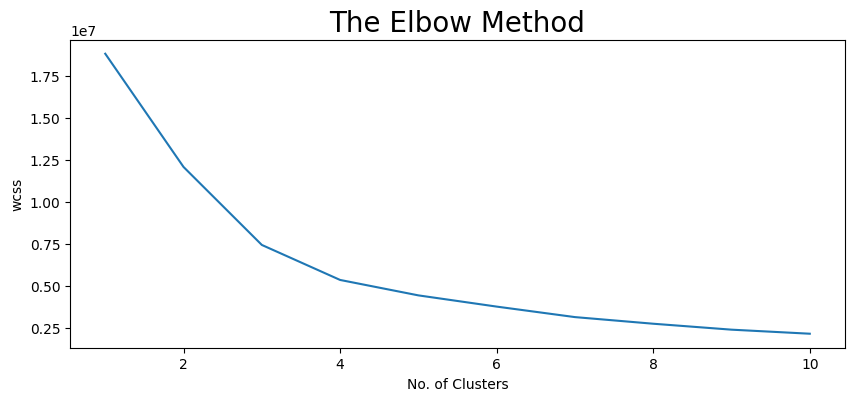

In [27]:
# to check about the no.of clusters we will use elbow method
# Let's determine the optimum number of clusters  within dataset

plt.rcParams['figure.figsize']=(10,4)

wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

# Let's plot the results
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show() # here we have 2 elbows one on 3 and second on 4

In [28]:
# here we will use last elbow on 4

# Apply Kmeans clustering

# Let's implement the kmeans algorithm to perform clustering analysis
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

# Let's find out results
a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})

# Let's check the cluster of each crops
print("Lets check the results after applying the k means clustering analysis \n")
print("Crops in first cluster:",z[z['cluster']==0]['label'].unique())
print("----------------------------------------------------")
print("Crops in Second cluster:",z[z['cluster']==1]['label'].unique())
print("----------------------------------------------------")
print("Crops in third cluster:",z[z['cluster']==2]['label'].unique())
print("----------------------------------------------------")
print("Crops in fourth cluster:",z[z['cluster']==3]['label'].unique())


Lets check the results after applying the k means clustering analysis 

Crops in first cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
----------------------------------------------------
Crops in Second cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
----------------------------------------------------
Crops in third cluster: ['grapes' 'apple']
----------------------------------------------------
Crops in fourth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [29]:
# train the data
# Using Logistic Regression
# split the data for predictive modelling
y=data['label']
X=data.drop(['label'],axis=1)

print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (2200, 7)
Shape of y (2200,)


In [30]:
# Let's create training and testing sets for validation of results
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print("The shape of X train:",X_train.shape)
print("The shape of X test:",X_test.shape)
print("The shape of y train:",y_train.shape)
print("The shape of y test:",y_test.shape)

The shape of X train: (1760, 7)
The shape of X test: (440, 7)
The shape of y train: (1760,)
The shape of y test: (440,)


In [31]:
# Make ML Model

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


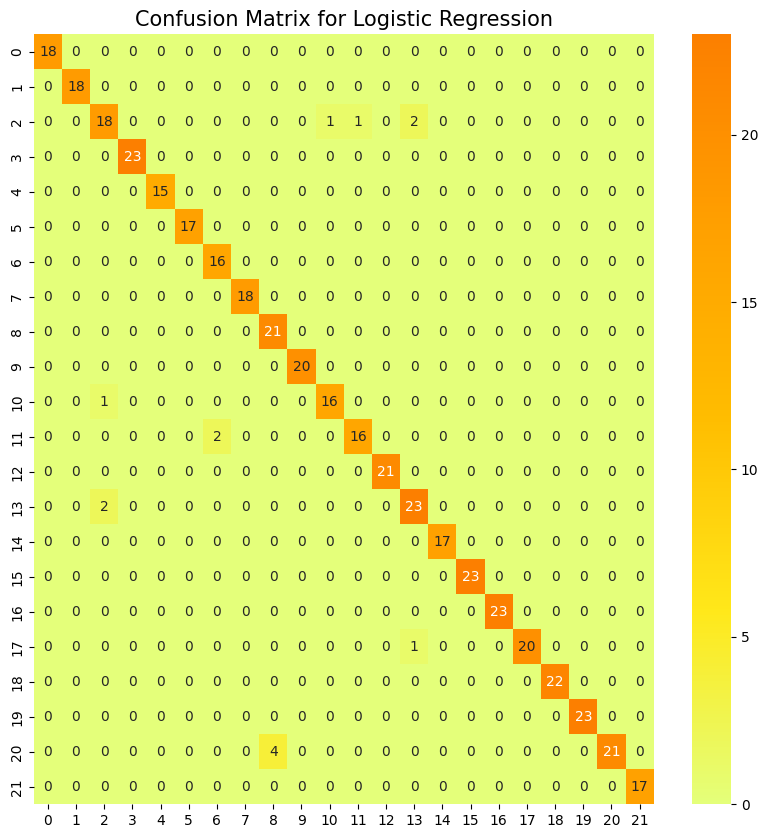

In [33]:
# Make predictions

# Lets evaluate the confusion matrix
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title("Confusion Matrix for Logistic Regression",fontsize=15)
plt.show()

In [35]:
# Lets print the classification report
from sklearn.metrics import classification_report

cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [36]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [37]:
prediction=model.predict((np.array([[90,40,40,20,80,7,200]])))
print("The Suggested Crop for given climatic condition is:",prediction)

The Suggested Crop for given climatic condition is: ['rice']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
